# Analysis - exp38

Repeats of stumbler (38) and stumbler-strategist (14) exps, with optimal parameters.

In [59]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

## Find the files
### Exp 13

In [70]:
# Std stumbler
path = "/Users/qualia/Code/azad/wythoff/exp13/"

files = []
exp_13 = []
runs = range(1, 21)
for r in runs:
    fi = os.path.join(path, "run_{}_monitor.csv".format(r))
    files.append(fi)
print(files)
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

['/Users/qualia/Code/azad/wythoff/exp13/run_1_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_2_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_3_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_4_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_5_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_6_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_7_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_8_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_9_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_10_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_11_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_12_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_13_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_14_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_15_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_16_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp13/run_17_mo

### Exp 14

In [60]:
# Std stumbler-strategist
path = "/Users/qualia/Code/azad/wythoff/exp14/"

exp_14 = []
runs = range(1, 21)
for r in runs:
    rpath = os.path.join(path, "run_{}_episode*_stumbler*.csv".format(int(r)))
    print(rpath)
    files = sorted(glob(rpath))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

/Users/qualia/Code/azad/wythoff/exp14/run_1_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_2_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_3_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_4_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_5_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_6_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_7_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_8_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_9_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_10_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_11_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_12_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_13_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_14_episode*_stumbler*.csv
/Users/qualia/Code/azad/wythoff/exp14/run_15_episode*_stu

### Exp 38

In [61]:
path = "/Users/qualia/Code/azad/wythoff/exp38/"
files = []
exp_38 = []
runs = range(1, 21)
for r in runs:
    fi = os.path.join(path, "run_{}_monitor.csv".format(r))
    files.append(fi)
print(files)
for fi in files:
    mon = load_monitored(fi)
    exp_38.append(mon)

['/Users/qualia/Code/azad/wythoff/exp38/run_1_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_2_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_3_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_4_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_5_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_6_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_7_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_8_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_9_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_10_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_11_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_12_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_13_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_14_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_15_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_16_monitor.csv', '/Users/qualia/Code/azad/wythoff/exp38/run_17_mo

In [71]:
pprint(exp_13[0].keys())
pprint(exp_14[0].keys())
pprint(exp_38[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


In [72]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_13]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_14]))
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_38]))

0.8391719961466536
0.8713005712138785
0.8596977224686683


In [73]:
print(np.mean([np.mean(mon['score'][-100:-1]) for mon in exp_13]))
print(np.mean([np.mean(mon['score'][-100:-1]) for mon in exp_14]))
print(np.mean([np.mean(mon['score'][-100:-1]) for mon in exp_38]))

0.8052224305919088
0.7992682742107236
0.8437818030135388


# Plots

## Optimal play

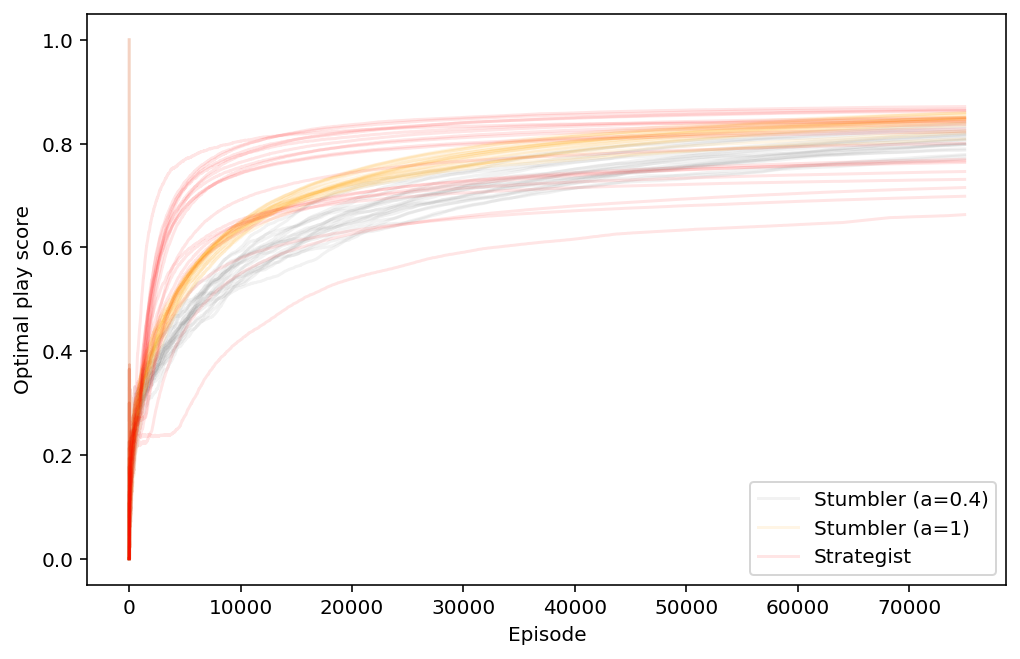

In [84]:
plt.figure(figsize=(7, 4.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler (a=0.4)"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_38):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler (a=1)"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='orange', alpha=.1, label=lab)

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=.1, label=lab)
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [96]:
episode_13, exp_13_avg, _ = score_summary(exp_13)
episode_14, exp_14_avg, _ = score_summary(exp_14)
episode_38, exp_38_avg, _ = score_summary(exp_38)

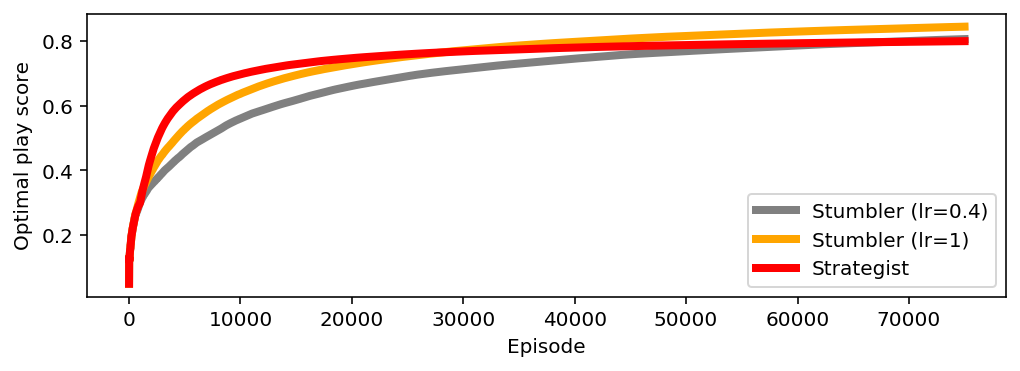

In [112]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_13, exp_13_avg, color='grey', alpha=1, linewidth=4, label="Stumbler (lr=0.4)")
_ = plt.plot(episode_38, exp_38_avg, color='orange', alpha=1, linewidth=4, label="Stumbler (lr=1)")
_ = plt.plot(episode_14, exp_14_avg, color='red', alpha=1, linewidth=4, label="Strategist")
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

## Total reward

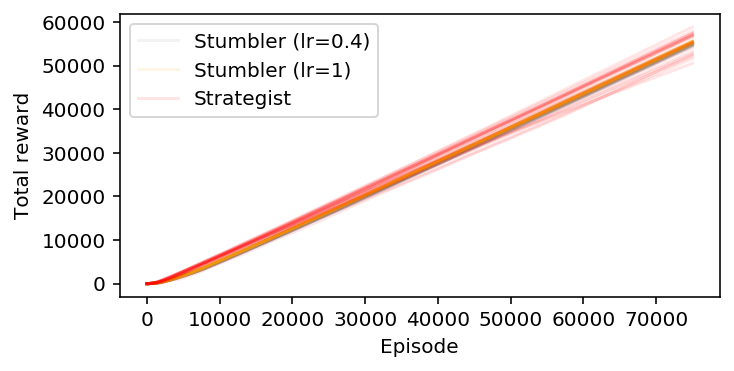

In [116]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler (lr=0.4)"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='grey', alpha=.1,  label=lab
    )
    
for n, mon in enumerate(exp_38):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler (lr=1)"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='orange', alpha=.1,  label=lab
    )

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='red', alpha=.1, label=lab
    )
_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Total reward")